In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error

In [2]:
trained_rf = joblib.load('mc124_randomforest.joblib')

In [3]:
trained_rf

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      random_state=123)

In [4]:
# Set the search path for files (assuming the directory is relative to the current script)
file_path_mc010 = os.path.join("data_preprocessing", "mc010_fresh_prepped.csv")
df = pd.read_csv(file_path_mc010, parse_dates=['datetime'])

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2194 entries, 0 to 2206
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     2194 non-null   datetime64[ns]
 1   station      2194 non-null   object        
 2   hour         2194 non-null   float64       
 3   day          2194 non-null   float64       
 4   month        2194 non-null   float64       
 5   year         2194 non-null   float64       
 6   day_of_week  2194 non-null   float64       
 7   is_weekend   2194 non-null   float64       
 8   no2          2194 non-null   float64       
 9   no           2194 non-null   float64       
 10  nox          2194 non-null   float64       
 11  pm10         2194 non-null   float64       
 12  pm2.5        2194 non-null   float64       
 13  no2_h-1      2194 non-null   float64       
 14  no_h-1       2194 non-null   float64       
 15  nox_h-1      2194 non-null   float64       
 16  pm10_h-1   

In [5]:
# prep for final testing
features = ['hour', 'day', 'month', 'year', 'day_of_week', 'is_weekend', 'no2_h-1', 'no_h-1', 'nox_h-1', 'pm10_h-1', 'pm2.5_h-1']
df_filtered = df[features]

# make pm10 predictions on new data
y_pred = trained_rf.predict(df_filtered)

# get true value of pm10
y_true = df['pm10']  

In [6]:
# calculate evaluation metrics
mae = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Median Absolute Error on new data: {mae}")
print(f"R2 score on new data: {r2}")

Median Absolute Error on new data: 1.2277056608698818
R2 score on new data: 0.8143227177962055


In [7]:
median_pm10= df['pm10'].median()
print(f"Median PM10 value: {median_pm10:.2f}")

Median PM10 value: 14.00


In [32]:
# relative deviation in percentage
rame = mae*100/median_pm10
print("relative absolute median error in percentage: " + str(rame) + "%")

relative absolute median error in percentage: 8.769326149070583%


In [8]:
# calculate the possible deviation  range
lower_bound = median_pm10 - mae
upper_bound = median_pm10 + mae

# Print the results
print(f"Median Value: {median_pm10:.2f}")
print(f"Median Absolute Error : {mae:.2f}")
print(f"Possible Deviation Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

Median Value: 14.00
Median Absolute Error : 1.23
Possible Deviation Range: [12.77, 15.23]


Information about the weather station:
https://luftdaten.berlin.de/station/mc010#station-info

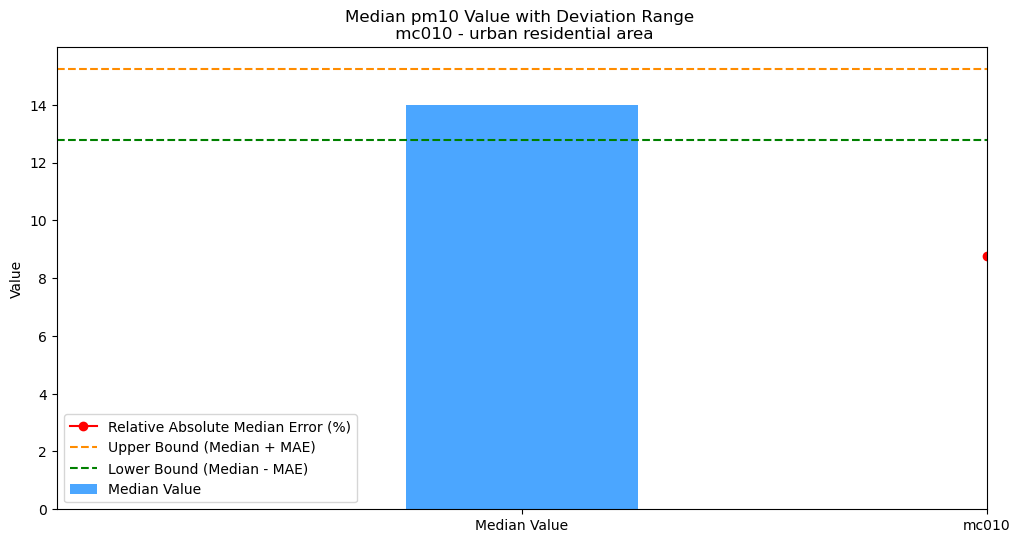

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(12, 6))

plt.bar('Median Value', median_pm10, color='#1E90FF', alpha=0.8, label='Median Value', width=0.5)

# plot the upper and lower bounds as horizontal lines
plt.axhline(y=upper_bound, color='darkorange', linestyle='--', label='Upper Bound (Median + MAE)')
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound (Median - MAE)')

# add labels and title
plt.ylabel('Value')
plt.title('Median pm10 Value with Deviation Range \n mc010 - urban residential area')
plt.legend()

# set x-limits to give more space on the left and right
plt.xlim(-1, 1) 

# show plot
plt.show()